### This jupyter notebook contains training process of machine learning models with the help of tensorflow library in the given problem.

### **Author : Umidjon Sattorov student at Mohirdev platform**

In [1]:
#Adding google drive to colab environment.
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
!pip install dill

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 2.4 MB/s eta 0:00:00


In [3]:
#Importing all necessary libraries and modules
from __future__ import absolute_import, division, print_function, unicode_literals

#Data processing
import pandas as pd
import numpy as np

#Visualization
import matplotlib.pyplot as plt
import seaborn as sns

#Preprocessing and feature engineering
from sklearn.model_selection import train_test_split

#Modelling
import tensorflow as tf
import fastai
from fastai.tabular.all import *

#Metrics
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import confusion_matrix, classification_report

#Saving machine learning model into pickle format
import dill

In [4]:
#Reading dataset into pandas dataframe
df = pd.read_csv(filepath_or_buffer = '/content/drive/MyDrive/ml/data/imputed_train_dataset.csv', sep = ',')
df.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,1,Male,disloyal Customer,33,Business travel,Eco,571,2,3,2,...,4,3,1,3,4,3,4,10,3.0,0
1,2,Female,Loyal Customer,49,Business travel,Business,1431,4,1,4,...,5,5,5,5,3,5,3,0,0.0,1
2,3,Female,Loyal Customer,43,Business travel,Eco,867,1,4,4,...,1,1,1,1,1,1,2,0,18.0,0
3,4,Female,Loyal Customer,27,Business travel,Business,1550,3,3,3,...,2,4,4,5,5,4,2,0,0.0,1
4,5,Male,Loyal Customer,11,Personal Travel,Eco,526,3,4,3,...,4,5,2,5,3,5,4,0,10.0,0


In [5]:
#Dropping unneccesary columns from the dataset
cols_left = ['Customer Type', 'Age', 'Type of Travel', 'Class', 'Flight Distance', 'Inflight wifi service', 'Ease of Online booking', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness', 'satisfaction']
df = df[cols_left]
df.head()

,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Ease of Online booking,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,satisfaction
0,disloyal Customer,33,Business travel,Eco,571,2,2,4,2,4,4,3,1,3,4,3,4,0
1,Loyal Customer,49,Business travel,Business,1431,4,4,3,5,4,5,5,5,5,3,5,3,1
2,Loyal Customer,43,Business travel,Eco,867,1,4,4,4,3,1,1,1,1,1,1,2,0
3,Loyal Customer,27,Business travel,Business,1550,3,3,2,2,2,2,4,4,5,5,4,2,1
4,Loyal Customer,11,Personal Travel,Eco,526,3,3,4,3,4,4,5,2,5,3,5,4,0


In [6]:
#Checking iff there is any empty values in the dataset
df.isna().sum()

Customer Type             0
Age                       0
Type of Travel            0
Class                     0
Flight Distance           0
Inflight wifi service     0
Ease of Online booking    0
Food and drink            0
Online boarding           0
Seat comfort              0
Inflight entertainment    0
On-board service          0
Leg room service          0
Baggage handling          0
Checkin service           0
Inflight service          0
Cleanliness               0
satisfaction              0
dtype: int64

In [6]:
#Dividing data into train and test datasets
train_df, test_df = train_test_split(df, test_size = 0.2, random_state = 1)

In [7]:
train_df.select_dtypes(include = ['int64', 'float64']).columns

Index(['Age', 'Flight Distance', 'Inflight wifi service',
       'Ease of Online booking', 'Food and drink', 'Online boarding',
       'Seat comfort', 'Inflight entertainment', 'On-board service',
       'Leg room service', 'Baggage handling', 'Checkin service',
       'Inflight service', 'Cleanliness', 'satisfaction'],
      dtype='object')

In [ ]:
#Creating training and test dataset for using with tensorflow algorithms
CATEGORICAL_COLUMNS = train_df.select_dtypes(include = ['object']).columns
NUMERIC_COLUMNS = ['Flight Distance', 'Inflight wifi service', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness']

preprocessing_layers = []
inputs = []

# Creating preprocessing layers for categorical features
for feature_name in CATEGORICAL_COLUMNS:
    vocabulary = df[feature_name].unique()
    cat_input = tf.keras.Input(shape = (1,), name = feature_name, dtype = tf.string)
    cat_layer = tf.keras.layers.StringLookup(vocabulary = list(vocabulary))(cat_input)
    cat_layer = tf.keras.layers.Lambda(lambda x: tf.cast(x, dtype = tf.float32))(cat_layer)
    inputs.append(cat_input)

# Creating preprocessing layers for numerical features
for feature_name in NUMERIC_COLUMNS:
    num_input = tf.keras.Input(shape = (1,), name = feature_name)
    norm_layer = tf.keras.layers.Normalization()(num_input)
    preprocessing_layers.append(norm_layer)
    inputs.append(num_input)

In [ ]:
# Concatenating preprocessing layers
concatenated_inputs = tf.keras.layers.concatenate(preprocessing_layers)

### Modelling linear classifier

In [ ]:
# Build the model
linear_model = tf.keras.layers.Dense(1, activation = 'sigmoid')(concatenated_inputs)
model = tf.keras.Model(inputs = inputs, outputs = linear_model)

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', tf.keras.metrics.AUC(name='auc')])

In [ ]:
#Making input function for model
def df_to_dataset(dataframe, shuffle=True, batch_size=32):
    dataframe = dataframe.copy()
    labels = dataframe.pop('satisfaction')
    ds = tf.data.Dataset.from_tensor_slices((dict(dataframe), labels))
    if shuffle:
        ds = ds.shuffle(buffer_size = len(dataframe))
    ds = ds.batch(batch_size)
    return ds

batch_size = 32
train_ds = df_to_dataset(train_df, batch_size = batch_size)
test_ds = df_to_dataset(test_df, shuffle = False, batch_size = batch_size)

In [ ]:
# Trainining model
model.fit(train_ds, epochs = 100)

# Evaluating the model
eval_result = model.evaluate(test_ds)
print(f"Evaluation results: {eval_result}")

# Getting predictions and calculate ROC AUC score
test_predictions = model.predict(test_ds)
true_labels = list(test_df['satisfaction'])
roc_auc = roc_auc_score(true_labels, test_predictions)
print(f"ROC AUC score: {roc_auc}")

Epoch 1/100
250/250 [==============================] - 2s 2ms/step - loss: 193.1610 - accuracy: 0.5021 - auc: 0.5001
Epoch 2/100
250/250 [==============================] - 1s 3ms/step - loss: 79.2515 - accuracy: 0.5006 - auc: 0.4995
Epoch 3/100
250/250 [==============================] - 1s 3ms/step - loss: 7.1710 - accuracy: 0.5839 - auc: 0.5846
Epoch 4/100
250/250 [==============================] - 1s 2ms/step - loss: 3.6418 - accuracy: 0.5916 - auc: 0.5873
Epoch 5/100
250/250 [==============================] - 1s 2ms/step - loss: 2.0572 - accuracy: 0.5870 - auc: 0.5841
Epoch 6/100
250/250 [==============================] - 1s 2ms/step - loss: 0.9998 - accuracy: 0.5817 - auc: 0.6089
Epoch 7/100
250/250 [==============================] - 1s 2ms/step - loss: 0.8096 - accuracy: 0.5943 - auc: 0.6254
Epoch 8/100
250/250 [==============================] - 1s 2ms/step - loss: 0.7864 - accuracy: 0.5984 - auc: 0.6336
Epoch 9/100
250/250 [==============================] - 1s 3ms/step - loss: 0.

###Checking if deep neural networks can give more higher results.

In [ ]:
# Building a deeper neural network
hidden_layers = tf.keras.layers.Dense(64, activation = 'relu')(concatenated_inputs)
hidden_layers = tf.keras.layers.Dropout(0.5)(hidden_layers)
hidden_layers = tf.keras.layers.Dense(32, activation = 'relu')(hidden_layers)
hidden_layers = tf.keras.layers.Dropout(0.5)(hidden_layers)
hidden_layers = tf.keras.layers.Dense(16, activation = 'relu')(hidden_layers)
deep_linear_model = tf.keras.layers.Dense(1, activation = 'sigmoid')(hidden_layers)

deep_model = tf.keras.Model(inputs = inputs, outputs = deep_linear_model)

# Compiling the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', tf.keras.metrics.AUC(name='auc')])

In [ ]:
# Training the model
model.fit(train_ds, epochs = 200)

# Evaluation of the model
eval_result = model.evaluate(test_ds)
print(f"Evaluation results: {eval_result}")

# Getting predictions and calculate ROC AUC score
test_predictions = model.predict(test_ds)
true_labels = list(test_df['satisfaction'])
roc_auc = roc_auc_score(true_labels, test_predictions)
print(f"ROC AUC score: {roc_auc}")

Epoch 1/200
250/250 [==============================] - 2s 4ms/step - loss: 0.4761 - accuracy: 0.7930 - auc: 0.8605
Epoch 2/200
250/250 [==============================] - 1s 4ms/step - loss: 0.4751 - accuracy: 0.7970 - auc: 0.8632
Epoch 3/200
250/250 [==============================] - 1s 4ms/step - loss: 0.4709 - accuracy: 0.7974 - auc: 0.8654
Epoch 4/200
250/250 [==============================] - 1s 3ms/step - loss: 0.4721 - accuracy: 0.7989 - auc: 0.8637
Epoch 5/200
250/250 [==============================] - 1s 2ms/step - loss: 0.4755 - accuracy: 0.7940 - auc: 0.8610
Epoch 6/200
250/250 [==============================] - 1s 2ms/step - loss: 0.4698 - accuracy: 0.7990 - auc: 0.8665
Epoch 7/200
250/250 [==============================] - 1s 2ms/step - loss: 0.4848 - accuracy: 0.7874 - auc: 0.8545
Epoch 8/200
250/250 [==============================] - 1s 2ms/step - loss: 0.4679 - accuracy: 0.8030 - auc: 0.8669
Epoch 9/200
250/250 [==============================] - 1s 3ms/step - loss: 0.476

###Making our neural network more deeper and evaluating it's performance on both train and test datasets.

In [ ]:
# Building a deeper neural network with batch normalization and regularization
hidden_layers_1 = tf.keras.layers.Dense(128, activation = 'relu', kernel_regularizer = tf.keras.regularizers.l2(0.01))(concatenated_inputs)
hidden_layers_1 = tf.keras.layers.BatchNormalization()(hidden_layers_1)
hidden_layers_1 = tf.keras.layers.Dropout(0.5)(hidden_layers_1)

hidden_layers_1 = tf.keras.layers.Dense(64, activation = 'relu', kernel_regularizer = tf.keras.regularizers.l2(0.01))(hidden_layers)
hidden_layers_1 = tf.keras.layers.BatchNormalization()(hidden_layers_1)
hidden_layers_1 = tf.keras.layers.Dropout(0.5)(hidden_layers_1)

hidden_layers_1 = tf.keras.layers.Dense(32, activation = 'relu', kernel_regularizer = tf.keras.regularizers.l2(0.01))(hidden_layers)
hidden_layers_1 = tf.keras.layers.BatchNormalization()(hidden_layers_1)
hidden_layers_1 = tf.keras.layers.Dropout(0.5)(hidden_layers_1)

hidden_layers_1 = tf.keras.layers.Dense(16, activation = 'relu', kernel_regularizer = tf.keras.regularizers.l2(0.01))(hidden_layers)
hidden_layers_1 = tf.keras.layers.BatchNormalization()(hidden_layers_1)
hidden_layers_1 = tf.keras.layers.Dropout(0.5)(hidden_layers_1)

adv_model = tf.keras.layers.Dense(1, activation = 'sigmoid')(hidden_layers_1)

# Model
advanced_model = tf.keras.Model(inputs = inputs, outputs = adv_model)

#Optimizer
initial_learning_rate = 0.001
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate, decay_steps = 10000, decay_rate = 0.9, staircase = True
)

optimizer = tf.keras.optimizers.AdamW(learning_rate = lr_schedule)
advanced_model.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy', tf.keras.metrics.AUC(name='auc')])

# Early stopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 100, restore_best_weights = True)


# Training the model
history = advanced_model.fit(train_ds, validation_data = test_ds, epochs = 200, callbacks = [early_stopping])

# Evaluation of the model
eval_result = advanced_model.evaluate(test_ds)
print(f"Evaluation results: {eval_result}")

# Getting predictions and calculate ROC AUC score
test_predictions = advanced_model.predict(test_ds).flatten()
true_labels = test_df['satisfaction'].values
roc_auc = roc_auc_score(true_labels, test_predictions)
print(f"ROC AUC score: {roc_auc}")

Epoch 1/200
250/250 [==============================] - 4s 6ms/step - loss: 1.0266 - accuracy: 0.4852 - auc: 0.4870 - val_loss: 0.7849 - val_accuracy: 0.6245 - val_auc: 0.6322
Epoch 2/200
250/250 [==============================] - 1s 4ms/step - loss: 0.8383 - accuracy: 0.5369 - auc: 0.5515 - val_loss: 0.7537 - val_accuracy: 0.6255 - val_auc: 0.6337
Epoch 3/200
250/250 [==============================] - 2s 7ms/step - loss: 0.7780 - accuracy: 0.5670 - auc: 0.5818 - val_loss: 0.7391 - val_accuracy: 0.5975 - val_auc: 0.6360
Epoch 4/200
250/250 [==============================] - 2s 7ms/step - loss: 0.7419 - accuracy: 0.5754 - auc: 0.5998 - val_loss: 0.7242 - val_accuracy: 0.5965 - val_auc: 0.6347
Epoch 5/200
250/250 [==============================] - 1s 4ms/step - loss: 0.7184 - accuracy: 0.5938 - auc: 0.6159 - val_loss: 0.7138 - val_accuracy: 0.5965 - val_auc: 0.6367
Epoch 6/200
250/250 [==============================] - 1s 4ms/step - loss: 0.7054 - accuracy: 0.5950 - auc: 0.6198 - val_loss

I thought deep neaural networks can solve the problem of classification for prediction of satisfaction of customers from airline service. But it didn't, so I keep working on the models like Random Forest and so on.

**Last experimentation goes with Tabular Learner object of fastai library. Here I will try to teach Tabular learner with my dataset and get "roc_auc" score. We will see how Tabular Learner object perform in the prediction of satisfaction of customer from airline service.**

In [ ]:
numerical_cols = ['Age', 'Flight Distance', 'Inflight wifi service', 'Ease of Online booking', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness']

In [12]:
train_df.dtypes[(train_df.dtypes == 'int64') | (train_df.dtypes == 'float')].index.to_list()

['Age',
 'Flight Distance',
 'Inflight wifi service',
 'Ease of Online booking',
 'Food and drink',
 'Online boarding',
 'Seat comfort',
 'Inflight entertainment',
 'On-board service',
 'Leg room service',
 'Baggage handling',
 'Checkin service',
 'Inflight service',
 'Cleanliness',
 'satisfaction']

In [9]:
train_df.head()

,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Ease of Online booking,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,satisfaction
2694,Loyal Customer,25,Personal Travel,Eco,1487,4,4,5,4,5,5,4,5,5,4,5,5,1
5140,Loyal Customer,30,Business travel,Business,501,1,0,2,0,2,2,1,3,1,2,2,2,0
2568,Loyal Customer,48,Business travel,Business,547,1,2,5,4,4,5,5,5,5,5,5,5,1
3671,disloyal Customer,38,Business travel,Eco,696,1,1,2,1,2,2,3,1,4,3,3,2,0
7427,Loyal Customer,64,Personal Travel,Eco,1180,3,3,2,3,2,2,3,2,5,4,5,2,0


In [14]:
train_df['satisfaction']

2694    1
5140    0
2568    1
3671    0
7427    0
       ..
2895    0
7813    0
905     1
5192    1
235     1
Name: satisfaction, Length: 8000, dtype: int64

In [14]:
from fastai.callback.core import Callback
from sklearn.metrics import roc_auc_score

#Metrics
class RocAucCallback(Callback):
    def __init__(self):
        self.outputs = []
        self.targets = []

    def before_epoch(self):
        self.outputs = []
        self.targets = []

    def after_batch(self):
        self.outputs.append(self.pred)
        self.targets.append(self.y)

    def after_epoch(self):
        outputs = torch.cat(self.outputs).detach().cpu().numpy()
        targets = torch.cat(self.targets).detach().cpu().numpy()
        roc_auc = roc_auc_score(targets, outputs)
        print(f'Epoch {self.epoch}: ROC AUC = {roc_auc:.4f}')

        if self.epoch == self.learn.epoch:
            self.learn.roc_outputs = outputs
            self.learn.roc_targets = targets



numerical_cols = ['Age', 'Flight Distance', 'Inflight wifi service', 'Ease of Online booking', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness']
#Tabular Learner object from Fastai library
dls = TabularDataLoaders.from_df(df = train_df, bs = 16, y_names = 'satisfaction', skipinitialspace = False, cat_names = train_df.dtypes[train_df.dtypes == 'object'].index.to_list(), cont_names = numerical_cols, procs = [Categorify, Normalize])
learn = tabular_learner(dls = dls)
learn.fit_one_cycle(100, cbs=RocAucCallback())

epoch,train_loss,valid_loss,time
0,0.480644,0.417993,00:08
1,0.328892,0.288940,00:08
2,0.205305,0.175915,00:07
3,0.134450,0.114838,00:05
4,0.127561,0.108764,00:08
5,0.124777,0.094754,00:05
6,0.109781,0.083837,00:07
7,0.096540,0.080118,00:05
8,0.092153,0.076177,00:06
9,0.080658,0.069930,00:05


Epoch 0: ROC AUC = 0.7920
Epoch 1: ROC AUC = 0.8717
Epoch 2: ROC AUC = 0.8880
Epoch 3: ROC AUC = 0.9089
Epoch 4: ROC AUC = 0.9257
Epoch 5: ROC AUC = 0.9334
Epoch 6: ROC AUC = 0.9436
Epoch 7: ROC AUC = 0.9550
Epoch 8: ROC AUC = 0.9581
Epoch 9: ROC AUC = 0.9609
Epoch 10: ROC AUC = 0.9650
Epoch 11: ROC AUC = 0.9648
Epoch 12: ROC AUC = 0.9676
Epoch 13: ROC AUC = 0.9669
Epoch 14: ROC AUC = 0.9651
Epoch 15: ROC AUC = 0.9671
Epoch 16: ROC AUC = 0.9655
Epoch 17: ROC AUC = 0.9713
Epoch 18: ROC AUC = 0.9710
Epoch 19: ROC AUC = 0.9683
Epoch 20: ROC AUC = 0.9682
Epoch 21: ROC AUC = 0.9728
Epoch 22: ROC AUC = 0.9725
Epoch 23: ROC AUC = 0.9745
Epoch 24: ROC AUC = 0.9732
Epoch 25: ROC AUC = 0.9739
Epoch 26: ROC AUC = 0.9745
Epoch 27: ROC AUC = 0.9767
Epoch 28: ROC AUC = 0.9744
Epoch 29: ROC AUC = 0.9753
Epoch 30: ROC AUC = 0.9752
Epoch 31: ROC AUC = 0.9761
Epoch 32: ROC AUC = 0.9783
Epoch 33: ROC AUC = 0.9774
Epoch 34: ROC AUC = 0.9795
Epoch 35: ROC AUC = 0.9781
Epoch 36: ROC AUC = 0.9779
Epoch 37: R

In [15]:
#Making prediction using learn object then calculating roc_auc score for test dataset
preds, targs = learn.get_preds(dl = learn.dls.test_dl(test_df))
roc_auc = roc_auc_score(targs, preds)
print(f"ROC AUC score of Tabular learner : {roc_auc}")

ROC AUC score of Tabular learner : 0.9864150739563734


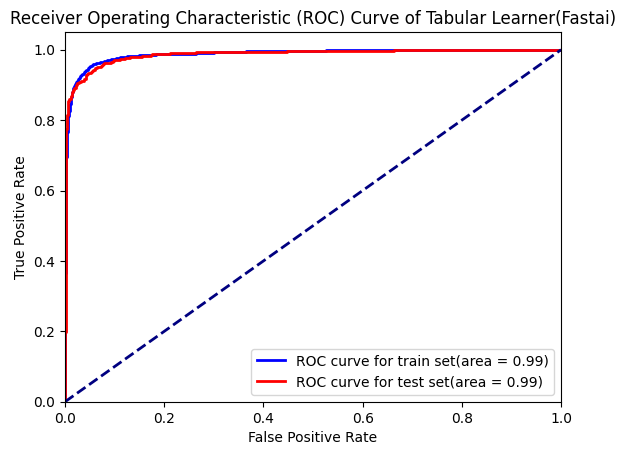

In [18]:
# Generate the ROC AUC curve
fpr_train, tpr_train, _ = roc_curve(learn.roc_targets, learn.roc_outputs)
fpr_test, tpr_test, _ = roc_curve(targs, preds)

# Plot the ROC AUC curve
plt.figure()
plt.plot(fpr_train, tpr_train, color='blue', lw=2, label = f'ROC curve for train set(area = {roc_auc_score(learn.roc_targets, learn.roc_outputs):.2f})')
plt.plot(fpr_test, tpr_test, color='red', lw=2, label = f'ROC curve for test set(area = {roc_auc_score(targs, preds):.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve of Tabular Learner(Fastai)')
plt.legend(loc="lower right")
plt.show()

**That was amazing score I have ever get, but I have already make pipeline for other machine learning model which is CatBoostClassifier. That is why, I am going to keep this model just in my inventory.**